# **Capstone Project 1**

## CONTEXT
The US Centers for Disease Control and Prevention conducted
 National Health and Nutrition Examination Survey
 Based on 2017-March 2020 Data on Body Measures (P_BMX) and
 Demographic Variables and Sample Weights (P_DEMO)

## Data Description
The survey consists of two datasets of
body measurements of both males and females who are of age 18 years and above. Each individual is represented by seven body measurement attributes.

 1. Weight (kg)  -  "BMXWT"
 2. Standing Height (cm)  -  "BMXHT"
 3. Upper Arm Length (cm)  -  "BMXARML"
 4. Upper Leg Length (cm)  -  "BMXLEG"
 5. Arm Circumference (cm)  -  "BMXARMC"
 6. Hip Circumference (cm)  -  "BMXHIP"
 7. Waist Circumference (cm)  - "BMXWAIST"


 Published: May 2021
 Description: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm
 and
 https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm

 License: public domain as per https://www.cdc.gov/other/agencymaterials.html


# **Data Collecting**

## 1. Importing packages and warehouse data

Importing numpy and pandas


In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore");

Downloading both datasets from Github reposoitory.

In [ ]:
import requests

url1 = 'https://raw.githubusercontent.com/gagolews/teaching-data/refs/heads/master/marek/nhanes_adult_male_bmx_2020.csv'
response = requests.get(url1, allow_redirects=True)
open('nhanes_adult_male_bmx_2020.csv', 'wb').write(response.content)

144073

In [ ]:
url2 = 'https://raw.githubusercontent.com/gagolews/teaching-data/refs/heads/master/marek/nhanes_adult_female_bmx_2020.csv'
response = requests.get(url2, allow_redirects=True)
open('nhanes_adult_female_bmx_2020.csv', 'wb').write(response.content)

148335

## 2. Reading data as matrix

Reading the datasets as a numpy matrices and removing commented lines and column headings

In [ ]:
matrix = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", comments="#", skip_header=1)

In [ ]:
matrix.shape

(4082, 7)

In [ ]:
matrix[:5]    #printing first 5 rows of the matrix

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3]])

In [ ]:
# Saving the 1st matrix as Male matrix and removing the column heading
male = np.delete(matrix, 0, axis=0)

In [ ]:
matrix1 = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", comments="#", skip_header=1)

In [ ]:
# Saving the 2nd matrix as Female matrix and removing the column heading
female = np.delete(matrix1, 0, axis = 0)

In [ ]:
female[:5]

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2]])

In [ ]:
print("The size and shape of the first dataset is",male.size,'and',male.shape,'respectively.')
print("The size and shape of the second dataset is",female.size,'and',female.shape,'respectively.')

The size and shape of the first dataset is 28567 and (4081, 7) respectively.
The size and shape of the second dataset is 29547 and (4221, 7) respectively.




*   The male matrix have a dataset of 4081 individuals.
*   The female matrix have a dataset of 4221 individuals.



In [ ]:
# Checking if any NaN values exist in the entire matrix
any_nan1 = np.isnan(male).any()
any_nan2 = np.isnan(female).any()

print("Any NaN values in male:", any_nan1)
print("Any NaN values in female:", any_nan2)

Any NaN values in male: False
Any NaN values in female: False


The Dataset is clean and has no null values.

# **Data Analysis & Visualisation**




In [ ]:
#import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # Necessary module for plotting purpose
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

## 3. Histogram of Weights





In [ ]:
# Extracting weight data from both matrices
male_weights = male[:, 0]
female_weights = female[:, 0]


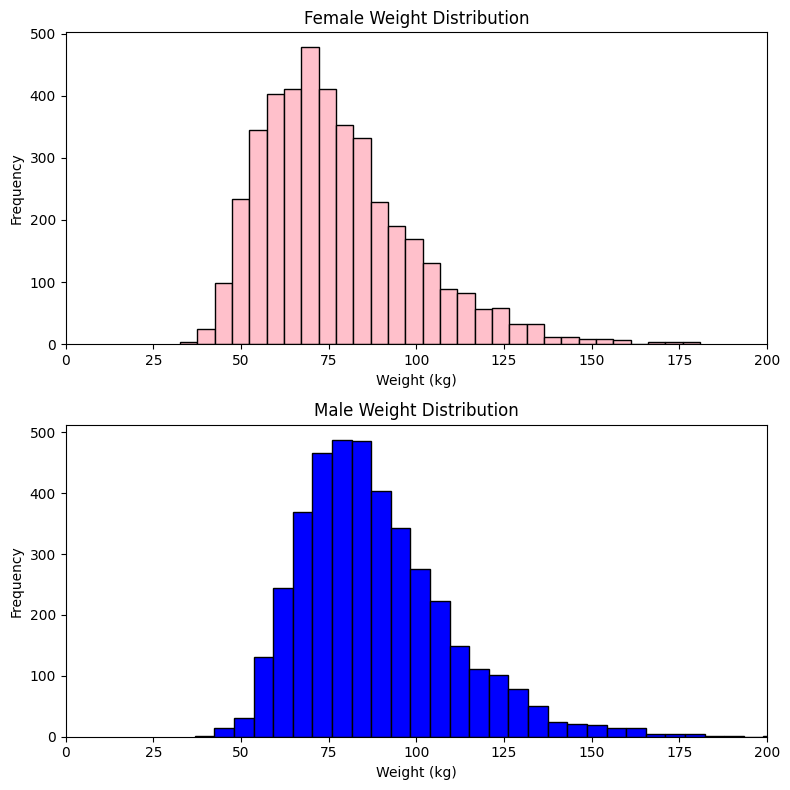

In [ ]:
# Plotting histograms
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].hist(female_weights, bins=30, color='pink', edgecolor='black')
axes[0].set_title("Female Weight Distribution")
axes[0].set_xlabel("Weight (kg)")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, 200)

axes[1].hist(male_weights, bins=30, color='blue', edgecolor='black')
axes[1].set_title("Male Weight Distribution")
axes[1].set_xlabel("Weight (kg)")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(0,200)
plt.tight_layout()
plt.show()


**Observations:**
*   Both male and female weights are right skewed.
*   The most frequent weight for females  falls somewhere between 60-80 kg whereas tht of males falls between 80-100 kg.
*   Potential outliers are present in both groups.



## 4. Boxplot of Weights

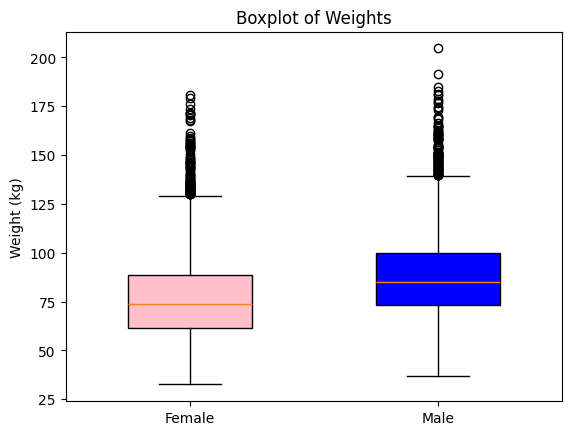

In [ ]:
# Boxplot comparison
bp = plt.boxplot([female_weights, male_weights], labels=["Female", "Male"], widths=0.5, patch_artist=True)
# patch_artist=True is needed to fill the boxes with color
plt.title("Boxplot of Weights")
plt.ylabel("Weight (kg)")

# Set colors for the boxes
colors = ['pink', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

**Observations:**
* Both attribute contain several outliers above the upper whisker .


In [ ]:
# Defining a function for counting the number of outliers present in the weights data
def count_outliers(data):
    q1 = np.percentile(data, 25)        # Defining 1st Quartile
    q3 = np.percentile(data, 75)        # Defining 3rd Quartile
    iqr = q3 - q1                       # Computing Inter-Quartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

male_outliers = count_outliers(male_weights)
female_outliers = count_outliers(female_weights)

print(f"Number of male weight outliers: {male_outliers}")
print(f"Number of female weight outliers: {female_outliers}")

Number of male weight outliers: 102
Number of female weight outliers: 107


## 5. Summary Statistics of Weights

In [ ]:
# Computing basic statistics
def compute_statistics(data):
    return {
        "Mean": np.mean(data).round(2),
        "Median": np.median(data),
        "Std Dev": np.std(data).round(2),
        "Skewness": pd.Series(data).skew().round(2),
        "Kurtosis": pd.Series(data).kurt().round(2)
    }

male_stats = compute_statistics(male_weights)
female_stats = compute_statistics(female_weights)
print("Male Weight Statistics:", male_stats)
print("Female Weight Statistics:", female_stats)

Male Weight Statistics: {'Mean': 88.36, 'Median': 85.0, 'Std Dev': 21.42, 'Skewness': 0.98, 'Kurtosis': 1.48}
Female Weight Statistics: {'Mean': 77.4, 'Median': 73.6, 'Std Dev': 21.54, 'Skewness': 1.03, 'Kurtosis': 1.4}


**Observations:**
*  The average weight of male is 88.36 kg which is higher than that of female which is 77.40 kg.
*  The median is slightly lower than the mean for both groups, it suggests  that data is slightly right-skewed.
*  Both males and females have similar standard deviations with a comparable level of variability in their weights.
*  Male weight has a kurtosis of 0.51, indicating a relatively normal distribution (slightly platykurtic).
*  Female weight has a kurtosis of 1.91, showing a heavier tail and a sharper peak (leptokurtic) compared to males.

## 6. Calculating BMI

In [ ]:
# Computing Body Mass Index of females and adding it to female dataset
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)
female = np.column_stack((female, female_bmi.round(2)))

Body Mass Index = Weight/(Height)^2

where weight is in Kg and height is in meters.

In [ ]:
female[:5]

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18]])

## 7. Standardizing Female data

In [ ]:
# Standardizing female data
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

In [ ]:
female[:5]

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18]])

In [ ]:
zfemale[:5]

array([[ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
         1.08316157,  1.11578462,  0.99760072],
       [ 0.63577599, -1.05306843, -1.07893145, -1.29349161,  1.03221804,
         1.04475528,  0.265089  ,  1.15620359],
       [-0.2044233 ,  0.15055289,  0.5835632 ,  0.26194406, -0.1622991 ,
        -0.19064688, -0.37293272, -0.25961714],
       [-0.7289676 , -0.38753664,  0.83933161, -0.76464348, -0.66150029,
        -0.52350135, -0.45915188, -0.67095304],
       [-1.02141265, -0.78402366, -0.6100227 , -0.98240447, -0.78630059,
        -1.06759039, -1.45354609, -0.89273916]])

Here we have computed z scores for each columns for standardizing the data.


## 8. Scatterplot & Correlation

### 8.1 Scatterplot Matrix

We have to draw a scatterplot matrix of the attributes Height, Weight, Waist circumference, Hip circumference and BMI

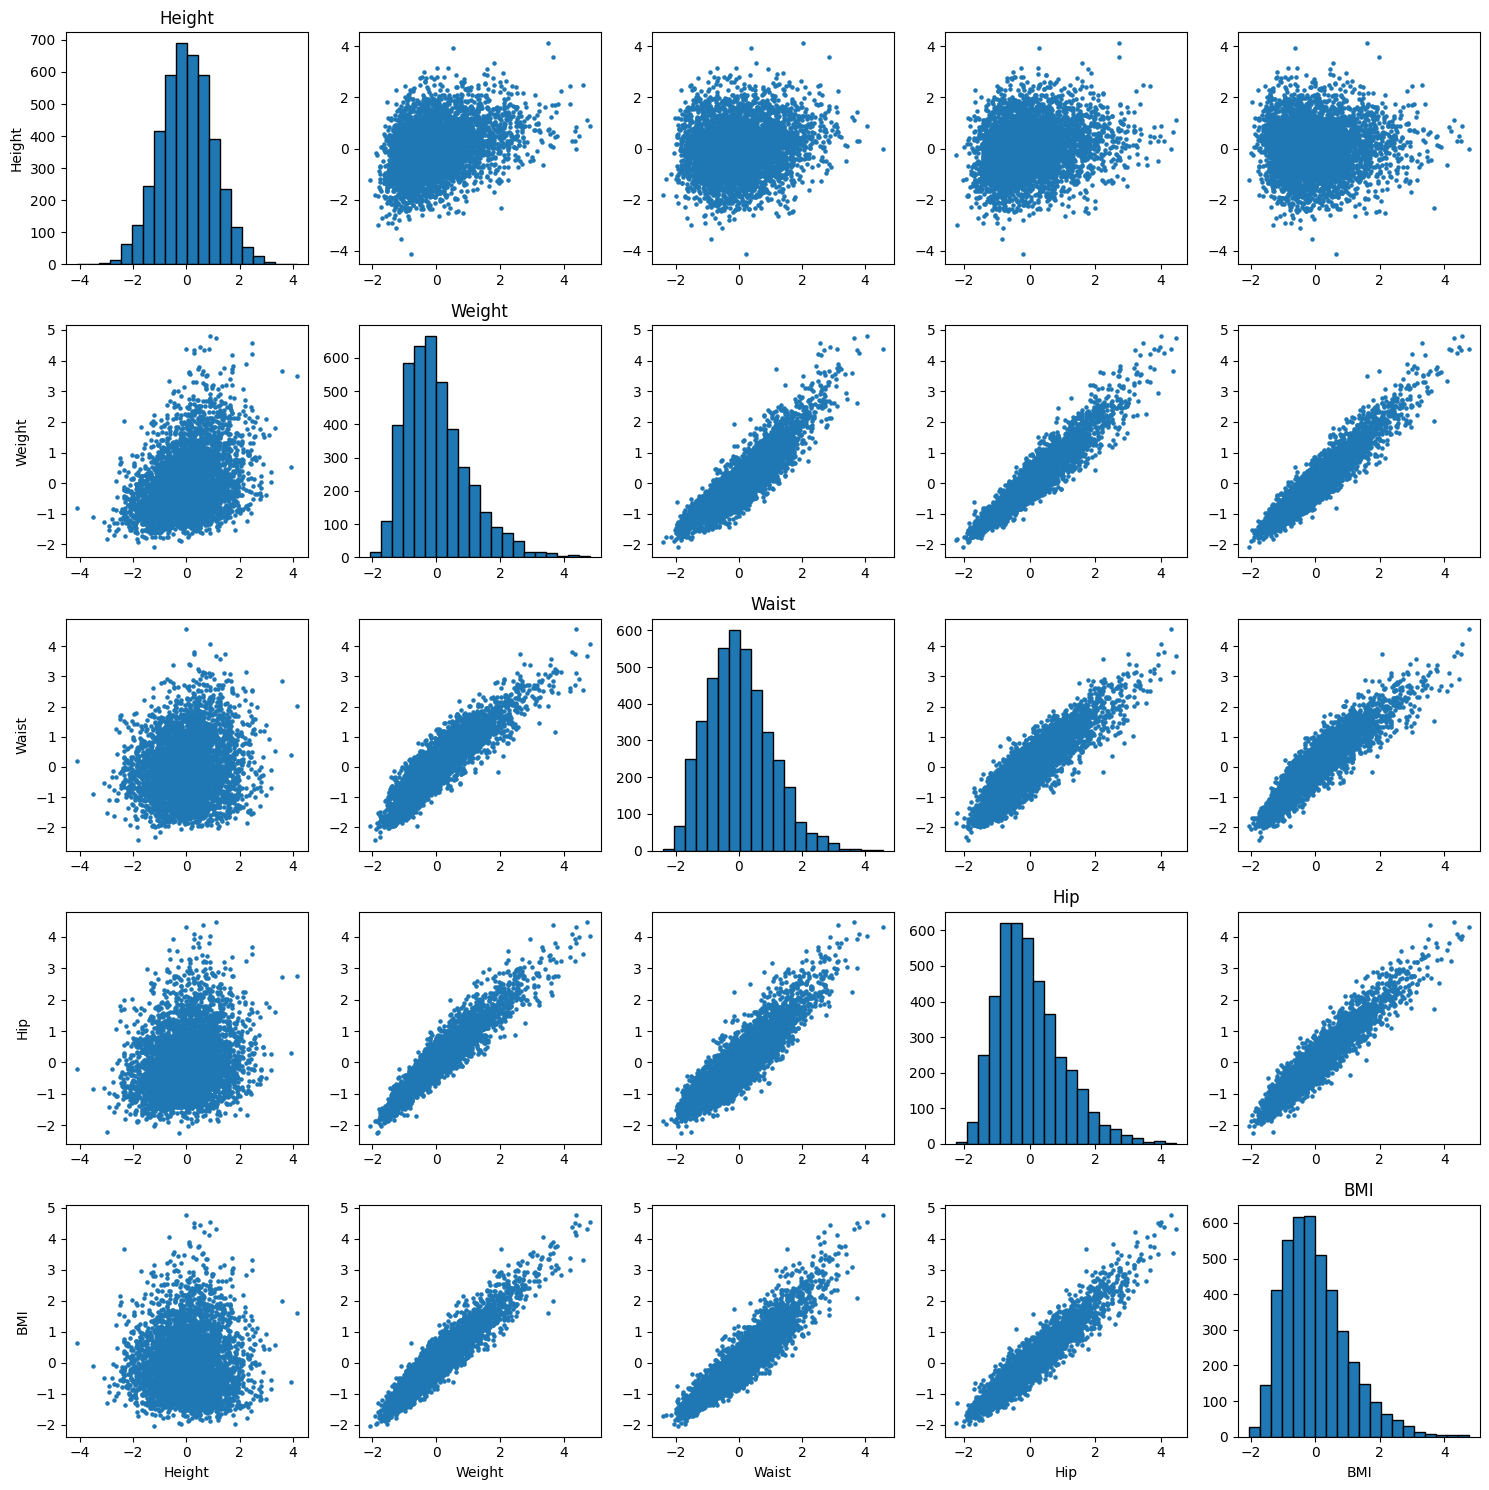

In [ ]:
# Scatterplot Matrix
# Defining the columns to use (adjusted indices as needed)
columns = ["Height", "Weight", "Waist", "Hip", "BMI"]
column_indices = [1, 0, 6, 5, 7]  # Indices of columns in zfemale

# Creating a figure and axes for the subplots
num_cols = len(column_indices)
fig, axes = plt.subplots(num_cols, num_cols, figsize=(15, 15))

# Looping through columns to create scatter plots and histograms
for i in range(num_cols):
    for j in range(num_cols):
        ax = axes[i, j]

        if i == j:  # Diagonal subplots will show Histogram
            ax.hist(zfemale[:, column_indices[i]], bins=20)
            ax.set_title(columns[i])
        else:  # Off-diagonal subplots will show Scatter plot
            ax.scatter(zfemale[:, column_indices[j]], zfemale[:, column_indices[i]], s=5)  # s=5 for smaller points

        # Setting labels for the outer plots only
        if i == num_cols - 1:
            ax.set_xlabel(columns[j])
        if j == 0:
            ax.set_ylabel(columns[i])

plt.tight_layout()  # Adjusting spacing between subplots
plt.show()

**Observations:**
* There should be a positive correlation between waist circumference and hip circumference. Individuals with larger waists tend to have larger hips as well.

* BMI is showing positive correlations with weight and waist circumference, as higher values in these measurements generally contribute to a higher BMI.



### 8.2 Correlations & Heatmap

In [ ]:
# Computing different Correlation coefficients
# 1. Pearson Correlation:
pearson_corr = np.corrcoef(zfemale, rowvar=False)

# 2. Spearman Correlation:
from scipy.stats import spearmanr  # Importing spearmanr from scipy.stats

num_vars = zfemale.shape[1]
spearman_corr = np.zeros((num_vars, num_vars))

for i in range(num_vars):
    for j in range(num_vars):
        spearman_corr[i, j] = spearmanr(zfemale[:, i], zfemale[:, j]).correlation

# Print the correlation matrices
print("Pearson Correlation Matrix:\n", np.round(pearson_corr, 2))
print("\nSpearman Correlation Matrix:\n", np.round(spearman_corr, 2))

Pearson Correlation Matrix:
 [[ 1.    0.35  0.55  0.19  0.91  0.95  0.9   0.95]
 [ 0.35  1.    0.67  0.66  0.15  0.2   0.13  0.03]
 [ 0.55  0.67  1.    0.48  0.45  0.46  0.43  0.36]
 [ 0.19  0.66  0.48  1.    0.08  0.1  -0.03 -0.01]
 [ 0.91  0.15  0.45  0.08  1.    0.87  0.85  0.92]
 [ 0.95  0.2   0.46  0.1   0.87  1.    0.9   0.94]
 [ 0.9   0.13  0.43 -0.03  0.85  0.9   1.    0.92]
 [ 0.95  0.03  0.36 -0.01  0.92  0.94  0.92  1.  ]]

Spearman Correlation Matrix:
 [[ 1.    0.34  0.54  0.2   0.91  0.95  0.9   0.94]
 [ 0.34  1.    0.67  0.65  0.14  0.21  0.11  0.02]
 [ 0.54  0.67  1.    0.46  0.42  0.45  0.4   0.34]
 [ 0.2   0.65  0.46  1.    0.08  0.12 -0.04 -0.02]
 [ 0.91  0.14  0.42  0.08  1.    0.87  0.84  0.92]
 [ 0.95  0.21  0.45  0.12  0.87  1.    0.89  0.93]
 [ 0.9   0.11  0.4  -0.04  0.84  0.89  1.    0.92]
 [ 0.94  0.02  0.34 -0.02  0.92  0.93  0.92  1.  ]]


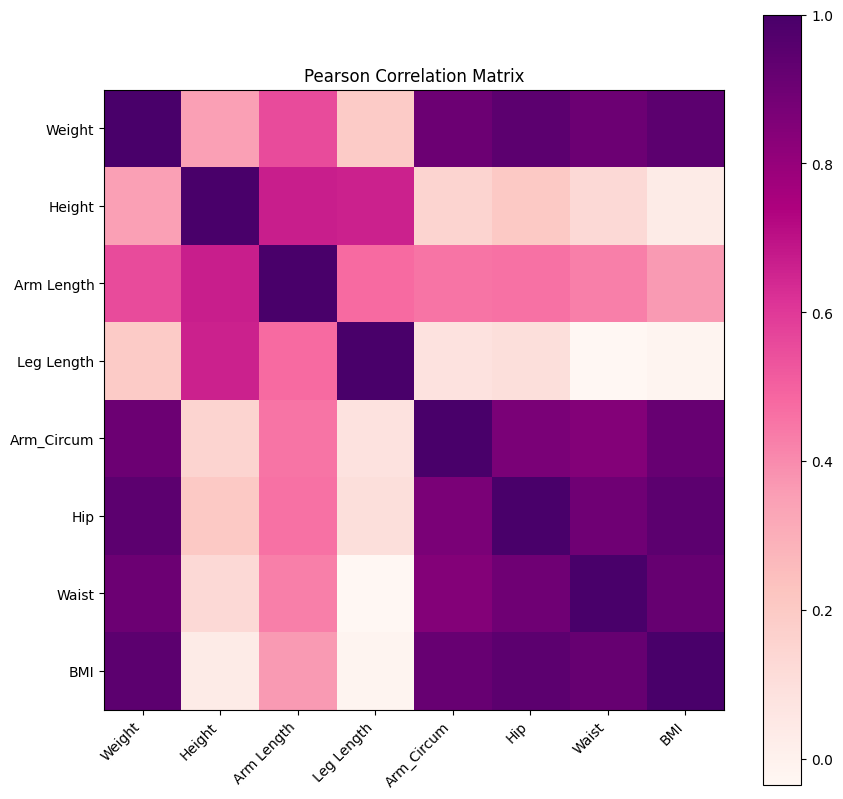

In [ ]:
# Generating a heatmap of the Pearson correlation
col_names = ["Weight", "Height", "Arm Length","Leg Length","Arm_Circum", "Hip","Waist", "BMI"]

plt.figure(figsize=(10, 10))
plt.imshow(pearson_corr, cmap='RdPu', interpolation='nearest')
plt.xticks(np.arange(len(col_names)), col_names, rotation=45, ha='right')  # Set x-axis labels
plt.yticks(np.arange(len(col_names)), col_names)  # Set y-axis labels
plt.colorbar()
plt.title("Pearson Correlation Matrix")
plt.show()


**Observations:**
*  None of the attributes have negative correlation.
*  The attribute weight has a strong correlation with attributes arm , hip, waist circumferences and BMI.
*   The attributes arm , hip, waist circumferences and  have a strong correlation with each other.


## 9. Finding out some ratios

In [ ]:
# Computing waist ratios of both male and female
male_waist_to_height = male[:, 6] / male[:, 1]
male_waist_to_hip = male[:, 6] / male[:, 5]
female_waist_to_height = female[:, 6] / female[:, 1]
female_waist_to_hip = female[:, 6] / female[:, 5]

male = np.column_stack((male, male_waist_to_height.round(2), male_waist_to_hip.round(2)))
female = np.column_stack((female, female_waist_to_height.round(2), female_waist_to_hip.round(2)))

In [ ]:
male[:5]

array([[ 98.8 , 182.3 ,  42.  ,  40.1 ,  38.2 , 108.2 , 120.4 ,   0.66,
          1.11],
       [ 74.3 , 184.2 ,  41.1 ,  41.  ,  30.2 ,  94.5 ,  86.8 ,   0.47,
          0.92],
       [103.7 , 185.3 ,  47.  ,  44.  ,  32.  , 107.8 , 109.6 ,   0.59,
          1.02],
       [ 86.  , 167.8 ,  39.5 ,  38.4 ,  29.  , 106.4 , 108.3 ,   0.65,
          1.02],
       [ 99.4 , 181.6 ,  40.4 ,  39.9 ,  36.  , 120.2 , 107.  ,   0.59,
          0.89]])

In [ ]:
female[:5]

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84,
          0.74,   0.93],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07,
          0.68,   0.82],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09,
          0.57,   0.87],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ,
          0.57,   0.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18,
          0.47,   0.79]])

## 10. Boxplot for Ratios

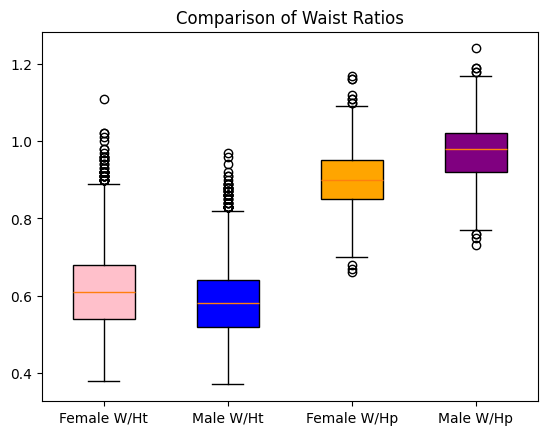

In [ ]:
# Boxplot for waist ratios
bp2 = plt.boxplot([
    female[:, -2], male[:, -2],
    female[:, -1], male[:, -1]
], labels=["Female W/Ht", "Male W/Ht", "Female W/Hp", "Male W/Hp"], widths = 0.5, patch_artist = True)
plt.title("Comparison of Waist Ratios")

# Setting colors for the boxes
colors = ['pink', 'blue','orange', 'purple']
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

**Observations:**
*  Presence of outliers in both ratios might be indicative of health risks mainly obesity for those individuals.
*  Male have higher Waist to Hip ratio compared to female.
*  Whereas females have a higher waist to height ratio compared to males.

## 11. Pros & Cons

### 1. Body Mass Index
#### Advantages:
* Simple to calculate using weight and height.
* Widely used in research and healthcare studies.
* Provides a general classification of underweight, normal weight, overweight, and obesity.

#### Disadvantages:
* Does not account for fat distribution.
* May misclassify athletes and elderly individuals.

### 2. Waist-to-Height Ratio
#### Advantages:
* Better indicator of central obesity (visceral fat) than BMI.
* More predictive of cardiovascular disease risk.

#### Disadvantages:
* Less commonly used in clinical settings compared to BMI.
* No universally agreed cut-off points for health risk classifications.

### 3. Waist-to-Hip Ratio
#### Advantages:
* Good indicator of fat distribution (apple vs. pear body shape).
* More useful than BMI for assessing obesity-related health risks.

#### Disadvantages:
* Measuring waist and hip circumference accurately can be inconsistent.
* Less commonly used than BMI in population studies.


## 12. Sorted 10

In [ ]:
# Printing standardised measurements for extreme BMI values
sorted_bmi_idx = np.argsort(zfemale[:, 7])
lowest_bmi = zfemale[sorted_bmi_idx[:5]]
highest_bmi = zfemale[sorted_bmi_idx[-5:]]
print("Lowest BMI Individuals:\n", lowest_bmi)
print("Highest BMI Individuals:\n", highest_bmi)

Lowest BMI Individuals:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05066905]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99522252]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97072289]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.9423549 ]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89335564]]
Highest BMI Individuals:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39660204]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46236421]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51523183]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54231037]
 [ 4.36328993 -0.03353037 -0.05585782 -0.1

**Observations:**
* The 5 individuals with the lowest BMI values are likely to be underweight or have a very low body fat percentage.
* The 5 individuals with the highest BMI values are likely to be overweight or obese.